In [1]:
maze = [[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,],
        [-1, 0, 0, 0,-1, 0, 0, 0,-1,-1, 0,-1,-1, 0, 0, 0, 0, 0, 0, 0, 0,-1,],
        [ 0, 0, 0, 0, 0, 0,-1, 0, 0, 0, 0, 0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,],
        [-1, 0,-1, 0, 0, 0, 0,-1,-1, 0, 0,-1,-1,-1,-1, 0,-1,-1,-1, 0,-1,-1,],
        [-1, 0,-1, 0, 0, 0,-1, 0,-1, 0,-1,-1, 0, 0, 0, 0,-1,-1,-1, 0, 0,-1,],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,-1,-1, 0, 0,-1,-1, 0, 0,-1, 0,-1,],
        [-1,-1,-1,-1,-1, 0,-1, 0,-1, 0, 0, 0, 0, 0, 0,-1,-1, 0, 0,-1, 0,-1,],
        [-1,-1,-1,-1,-1, 0,-1,-1,-1, 0, 0,-1, 0,-1, 0, 0,-1,-1, 0, 0, 0,-1,],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,-1, 0,-1, 0, 9,-1, 0,-1, 0, 0,-1,],
        [-1,-1,-1,-1,-1, 0,-1, 0, 0,-1, 0,-1, 0,-1, 0, 0, 0, 0, 0,-1, 0,-1,],
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,]]

In [31]:
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
Y,X = len(maze),len(maze[0])
Y,X

(11, 22)

In [47]:
# maze[-3][-7]
#This is the start, we change the value and save it for later
maze[8][15] = 0
start = (15,8)
exit  = (0,2)

We can use the 'NetworkX' library to transform the above array into a graph. 

The maze array has one major concept to remember for our transcription, that is if an element has value `0` then it is an opening (the other value of `-1` is a wall but we do not need to encode walls only connections). 

The following code will iterate over the maze starting at `0,0` and ending at `Y-1,X-1`. It will only encode nodes that are to the top, bottom, left, or right of the current position (Dirichlet neighborhood). The nodes of the maze will be named by the `(x,y)` pair-tuple. Another option is to number then via the $\mathbf{Z^+}$. 

```
# Name the nodes with a single positive integer
for j in range(Y):
  for i in range(X):
    print(i + j*X, end=' ')
  print(' ')
```

If we do the above, we need to encode and decode the tuples in-order to define the edge between the nodes. 


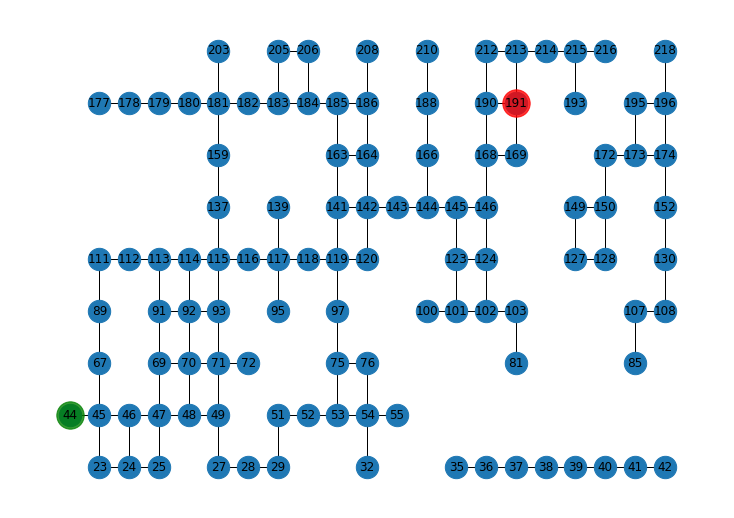

In [49]:
M = nx.Graph()
pos = {}
labels = {}
for i in range(X):
  for j in range(Y):
    #Is the position an opening? 
    if maze[j][i] == 0:
      #Dictionary for plotting arrangement
      pos[(i,j)] = (i,j) 
      labels[(i,j)] = i + j*X
      if maze[j+1][i] == 0: #Up
        M.add_edge((i,j),(i,j+1))
      if maze[j-1][i] == 0: #Down
        M.add_edge((i,j),(i,j-1))
      if maze[j][i-1] == 0: #left
        M.add_edge((i,j),(i-1,j))
      if maze[j][i+1] == 0: #Right
        M.add_edge((i,j),(i+1,j)) 

nx.draw(M,pos=pos,labels=labels,node_size=500)
nx.draw_networkx_nodes(M,pos,
                       nodelist=[start],
                       node_color='r',
                       node_size=750,
                   alpha=0.8)
nx.draw_networkx_nodes(M,pos,
                       nodelist=[exit],
                       node_color='g',
                       node_size=750,
                   alpha=0.8)
plt.axis('off')
plt.gcf().set_size_inches(10,7)
plt.show()

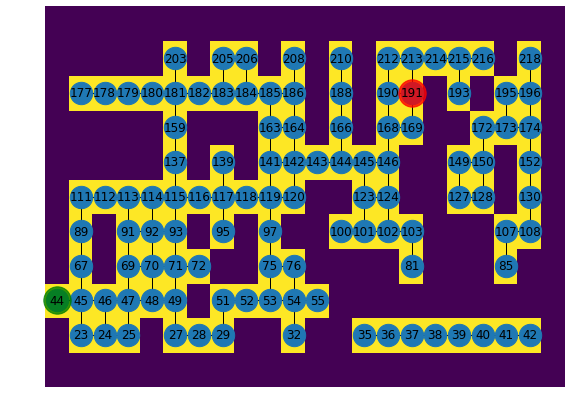

In [70]:
import numpy as np
#Lets make sure they line up -- Sanity checks are great
# they also make for amazing Unit Tests!
plt.pcolor(np.linspace(0,X,X+1)-0.5,np.linspace(0,Y,Y+1)-0.5,
           np.asarray(maze))

plt.gcf().set_size_inches(10,7)
plt.axis('off')
nx.draw(M,pos=pos,labels=labels,node_size=500)
nx.draw_networkx_nodes(M,pos, nodelist=[start],
                       node_color='r', node_size=750,
                      alpha=0.8)
nx.draw_networkx_nodes(M,pos, nodelist=[exit],
                       node_color='g', node_size=750,
                       alpha=0.8)
plt.axis('off')
# plt.gcf().set_size_inches(11,7)
plt.show()